## Student Names : Rizwan Amir & Muhammad Usman Zakaria
## Registration # : SP21-BSCS-0052 & SP21-BSCS-0082

### ***Hotel Recommendation System***

## Goal Statement

The primary objective of this project is to build a hotel recommendation system that meets the user’s needs and requirements. We aim to make it convenient for the users to locate or discover the most suitable hotels for any destination by considering metrics such as room amenities, guest capacity, and their personal preferences. The main challenge to overcome is displaying customized recommendations and significantly improve overall user experience by optimizing


## **Importing all the libraries use in this project**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Retrieving Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_details = pd.read_csv('/content/drive/MyDrive/Recommendation system Project/Book1.csv', delimiter=',')
hotel_rooms = pd.read_csv('/content/drive/MyDrive/Recommendation system Project/Hotel_Room_attributes.csv', delimiter=',')

In [ ]:
hotel_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr,permanent_price
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR,428
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR,219
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR,292
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR,214
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR,281


In [ ]:
hotel_details.shape

(108048, 15)

In [ ]:
hotel_details.describe()

,id,hotelid,zipcode,starrating,latitude,longitude,Source,permanent_price
count,108048.00000,1.080480e+05,8.348600e+04,108048.000000,108048.000000,108048.000000,108048.000000,108048.000000
mean,100429.50000,1.196298e+06,4.814535e+04,3.186537,46.770001,8.345943,3.087461,316.625185
std,31190.91528,2.096632e+06,9.635945e+04,0.665614,5.438123,9.119117,1.442162,98.583376
min,46406.00000,3.100000e+01,0.000000e+00,2.000000,0.000000,-111.908966,2.000000,200.000000
25%,73417.75000,9.402175e+04,9.920000e+03,3.000000,43.309794,1.442162,2.000000,237.000000
50%,100429.50000,3.065795e+05,3.430000e+04,3.000000,46.686896,8.975729,2.000000,275.000000
75%,127441.25000,1.066211e+06,6.311000e+04,4.000000,50.777548,13.661896,5.000000,425.000000
max,154453.00000,9.061192e+06,9.545142e+06,4.000000,69.536102,34.408731,5.000000,500.000000


In [ ]:
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               108048 non-null  int64  
 1   hotelid          108048 non-null  int64  
 2   hotelname        108048 non-null  object 
 3   address          102955 non-null  object 
 4   city             108047 non-null  object 
 5   country          108048 non-null  object 
 6   zipcode          83486 non-null   float64
 7   propertytype     108048 non-null  object 
 8   starrating       108048 non-null  int64  
 9   latitude         108048 non-null  float64
 10  longitude        108048 non-null  float64
 11  Source           108048 non-null  int64  
 12  url              107937 non-null  object 
 13  curr             108048 non-null  object 
 14  permanent_price  108048 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 12.4+ MB


In [ ]:
hotel_rooms.head()

,id,hotelcode,roomamenities,roomtype,ratedescription,price
0,50677497.0,634876.0,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",1657.0
1,50672149.0,8328096.0,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",2106.0
2,50643430.0,8323442.0,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",2374.0
3,50650317.0,7975.0,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",2428.0
4,50650318.0,7975.0,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",1514.0


In [ ]:
hotel_rooms.shape

(165857, 6)

In [ ]:
hotel_rooms.describe()

,id,hotelcode,price
count,1.495640e+05,1.495640e+05,109220.000000
mean,7.122515e+07,1.169951e+06,753.884948
std,5.438841e+06,2.143406e+06,268.661803
min,5.064343e+07,3.100000e+01,300.000000
25%,6.858559e+07,8.284300e+04,526.000000
50%,7.338063e+07,1.553130e+05,751.000000
75%,7.473906e+07,7.906430e+05,977.000000
max,8.336457e+07,8.977298e+06,2500.000000


In [ ]:
hotel_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165857 entries, 0 to 165856
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               149564 non-null  float64
 1   hotelcode        149564 non-null  float64
 2   roomamenities    145182 non-null  object 
 3   roomtype         150086 non-null  object 
 4   ratedescription  145683 non-null  object 
 5   price            109220 non-null  float64
dtypes: float64(3), object(3)
memory usage: 7.6+ MB


## **Data Preparation**

In [ ]:
hotel_details.isnull().sum()

id                     0
hotelid                0
hotelname              0
address             5093
city                   1
country                0
zipcode            24562
propertytype           0
starrating             0
latitude               0
longitude              0
Source                 0
url                  111
curr                   0
permanent_price        0
dtype: int64

In [ ]:
hotel_rooms.isnull().sum()

id                 16293
hotelcode          16293
roomamenities      20675
roomtype           15771
ratedescription    20174
price              56637
dtype: int64

In [ ]:
hotel_details=hotel_details.dropna()
hotel_rooms=hotel_rooms.dropna()

In [ ]:
hotel_details.isnull().sum()


id                 0
hotelid            0
hotelname          0
address            0
city               0
country            0
zipcode            0
propertytype       0
starrating         0
latitude           0
longitude          0
Source             0
url                0
curr               0
permanent_price    0
dtype: int64

In [ ]:
hotel_rooms.isnull().sum()

id                 0
hotelcode          0
roomamenities      0
roomtype           0
ratedescription    0
price              0
dtype: int64

In [ ]:
del hotel_details['id']
del hotel_details['zipcode']
del hotel_rooms['id']

In [ ]:
hotel=pd.merge(hotel_rooms,hotel_details,left_on='hotelcode',right_on='hotelid',how='inner')
hotel.isnull().sum()

hotelcode          0
roomamenities      0
roomtype           0
ratedescription    0
price              0
hotelid            0
hotelname          0
address            0
city               0
country            0
propertytype       0
starrating         0
latitude           0
longitude          0
Source             0
url                0
curr               0
permanent_price    0
dtype: int64

In [ ]:
hotel.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription', 'price',
       'hotelid', 'hotelname', 'address', 'city', 'country', 'propertytype',
       'starrating', 'latitude', 'longitude', 'Source', 'url', 'curr',
       'permanent_price'],
      dtype='object')

In [ ]:
del hotel['hotelid']
del hotel['url']
del hotel['curr']
del hotel['Source']

In [ ]:
hotel['description']=hotel['roomamenities']+hotel['ratedescription']
hotel.isnull().sum()

hotelcode          0
roomamenities      0
roomtype           0
ratedescription    0
price              0
hotelname          0
address            0
city               0
country            0
propertytype       0
starrating         0
latitude           0
longitude          0
permanent_price    0
description        0
dtype: int64

In [ ]:
hotel.describe()


,hotelcode,price,starrating,latitude,longitude,permanent_price
count,6.101600e+04,61016.000000,61016.000000,61016.000000,61016.000000,61016.000000
mean,1.088538e+06,752.410171,3.384243,45.325303,6.873276,345.963321
std,2.111076e+06,268.158704,0.649969,5.188643,9.807658,102.663651
min,3.100000e+01,300.000000,2.000000,0.000000,-111.908966,200.000000
25%,7.809600e+04,524.750000,3.000000,41.881599,2.196881,250.000000
50%,1.443040e+05,750.000000,3.000000,45.658588,7.439260,297.000000
75%,5.149350e+05,975.000000,4.000000,48.866108,12.324679,446.000000
max,8.970542e+06,2494.000000,4.000000,67.209099,34.015869,500.000000


In [ ]:
del hotel['roomamenities']
del hotel['ratedescription']

In [ ]:
hotel.columns

Index(['hotelcode', 'roomtype', 'price', 'hotelname', 'address', 'city',
       'country', 'propertytype', 'starrating', 'latitude', 'longitude',
       'permanent_price', 'description'],
      dtype='object')

In [ ]:
sum(hotel.duplicated())

169

In [ ]:
hotel_remove_duplicate=hotel.drop_duplicates()

In [ ]:
sum(hotel_remove_duplicate.duplicated())

0

## **Data Exploration | Data Analysis**





## Visualization

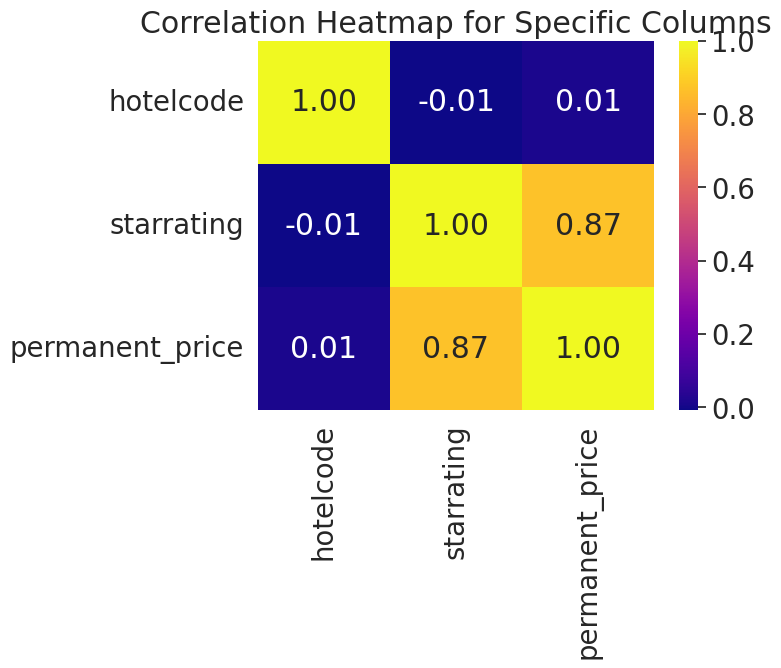

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Specify the columns you want for correlation
selected_columns = ['hotelcode', 'starrating','permanent_price']

# Select only the specified columns
selected_data = hotel[selected_columns]


# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


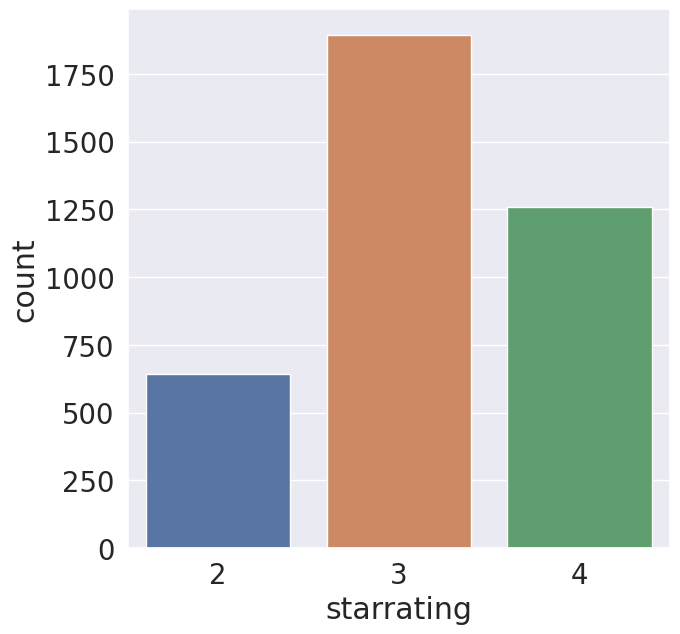

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you want to set the figure size, use figsize=(width, height)
plt.figure(figsize=(7, 7))

# Assuming you want to drop duplicates based on both "hotelname" and "starrating"
plot = hotel[["hotelname", "starrating"]].drop_duplicates()

# Use sns.countplot directly without creating a subplot
sns.countplot(x="starrating", data=plot)

# Show the plot
plt.show()


<Axes: >

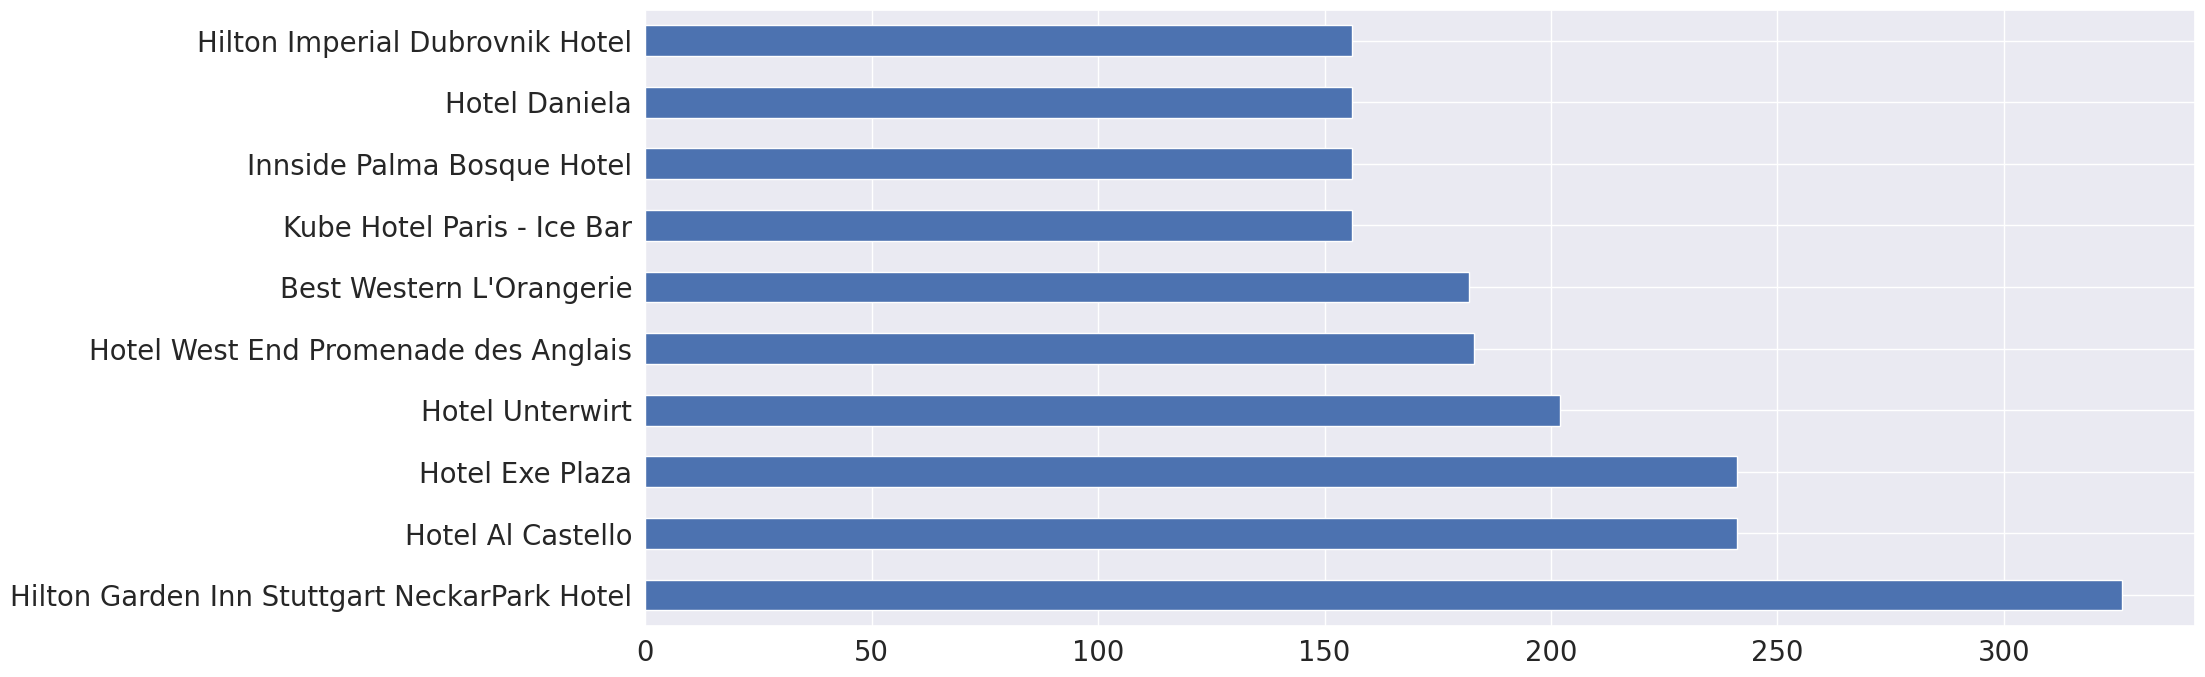

In [ ]:
hotel_count=hotel["hotelname"].value_counts()
hotel_count[:10].plot(kind="barh",figsize=(20,8))

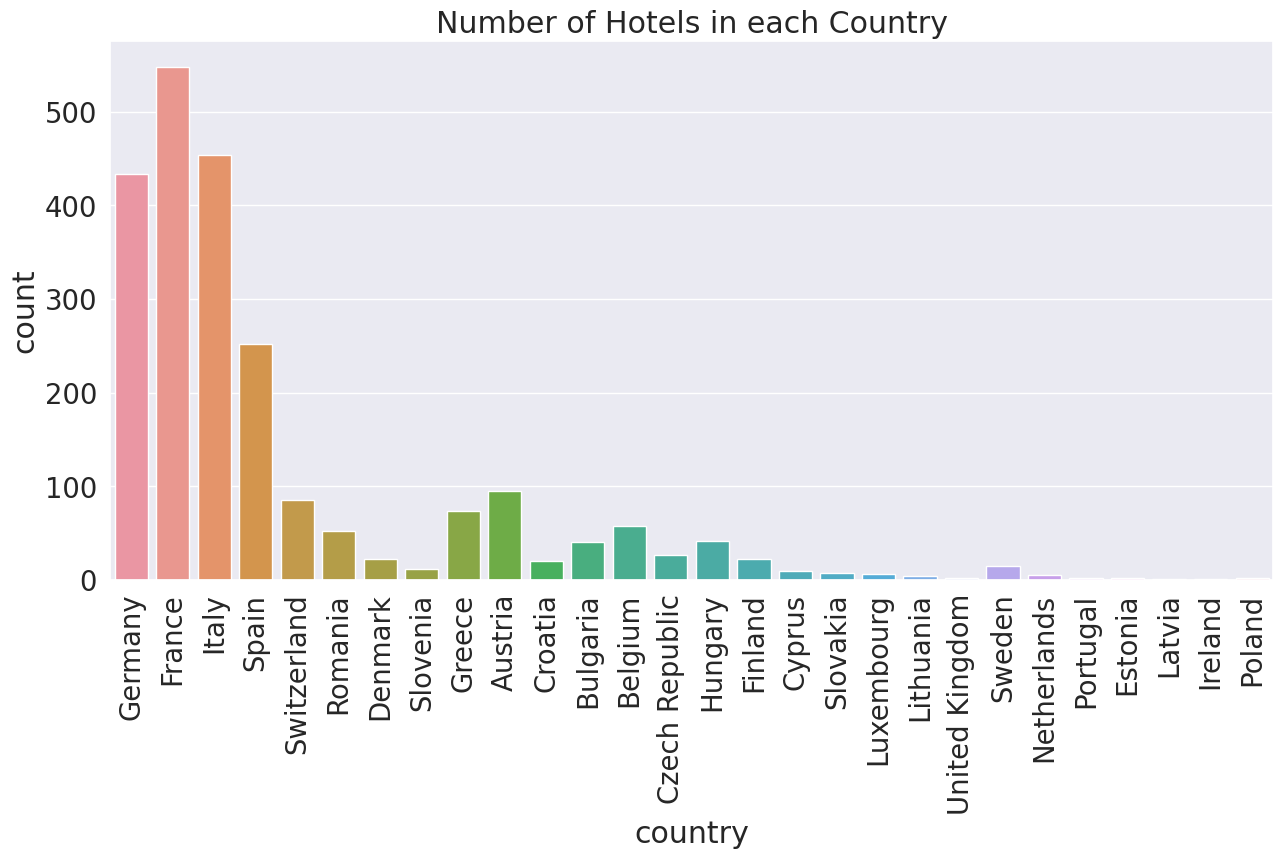

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you want to drop duplicates based on both "city" and "country"
plot = hotel[["city", "country"]].drop_duplicates()

# Group by "country" and count the occurrences
country_counts = plot.groupby("country").count()

# Set font scale for seaborn
sns.set(font_scale=1.8)

# Set the figure size directly using plt.figure
plt.figure(figsize=(15, 7))

# Create a countplot
sns.countplot(x="country", data=plot).set(title="Number of Hotels in each Country")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


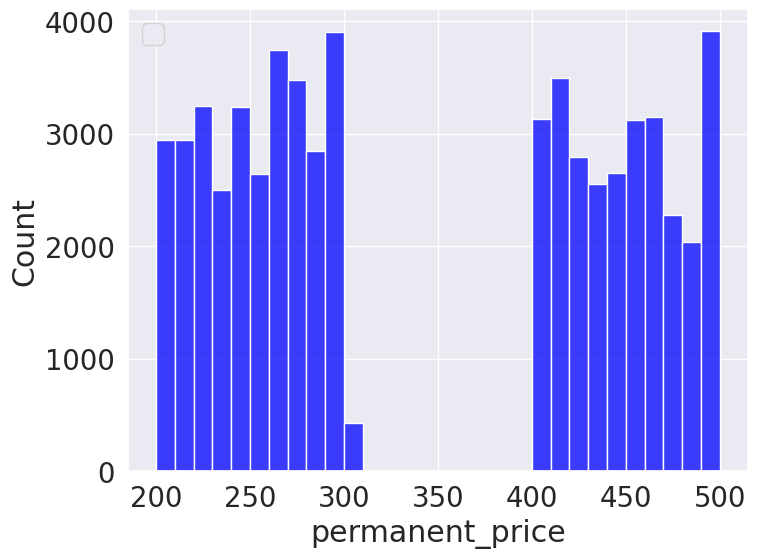

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hotel' is your DataFrame
plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(hotel['permanent_price'], bins=30, kde=False, color='blue')
# KDE


plt.legend()
plt.show()


## **Data Modeling**

In [ ]:
def citybased(city):
    hotel['city']=hotel['city'].str.lower()
    citybase=hotel[hotel['city']==city.lower()]
    citybase=citybase.sort_values(by='starrating',ascending=False)
    citybase.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    if not citybase.empty:
        hname=citybase[['hotelname','starrating','address','description','city']]
        return hname.head()
    else:
        print('No Hotels Available')

In [ ]:
unique_cities = hotel['city'].unique()      #['munich' 'paris' 'venice' ... 'kapolna' 'kamp-lintfort' 'jungholtz']
print(unique_cities)


['Munich' 'Paris' 'Venice' 'Miajadas' 'Luzern' 'Neung-sur-Beuvron' 'Thun'
 'Montlucon' 'Florence' 'Iasi' 'Copenhagen' 'Rome' 'Rothenberg'
 'Obermaiselstein' 'Sollies-Pont' 'Guidonia Montecelio' 'Mainz' 'Cologne'
 'Novo Mesto' 'Andorra' 'Thessaloniki' 'Bad Kleinkirchheim' 'Leipzig'
 'Konnersreuth' 'Vicenza' 'Seville' 'Athens' 'Birkenwerder' 'Galati'
 'Dusseldorf' 'Jadranovo' 'Bolzano' 'Neu Wulmstorf' 'Gijon' 'Berlin'
 'Hamburg' 'Vienna' 'Belleville' 'Antony' 'Schonberg (Holstein)'
 'Saint Loup' 'Bansko' 'Desenzano Del Garda' 'Antwerp' 'Mungia' 'Brest'
 'Hanau' 'Castelluzzo' 'Genoa' 'Narbonne' 'Fuerteventura' 'Peine'
 'Saint-Cloud' 'Zurich' 'Grasse' 'Aranjuez' 'Aix-en-Provence'
 'Gars am Kamp' 'Karlovy Vary' 'Lignano Sabbiadoro' 'Straubing' 'Vannes'
 'Chemnitz' 'Blanquefort' 'Naples' 'Salzburg' 'Sant Cugat del Valles'
 'Agde' 'Oudenaarde' 'Conil De La Frontera' 'Kempten' 'Tenerife'
 'Ioannina' 'Locarno' 'Jaen' 'Paty' 'Lormont' 'Olite' 'Madrid' 'Plovdiv'
 'Saint Gallen' 'Pescasseroli' 'In

In [ ]:
print('Top hotels')
citybased('munich')

Top hotels


,hotelname,starrating,address,description,city
34914,Grand Excelsior Hotel Munich Airport,4,Freisinger Street 80,Air conditioning: ;Bathrobes: ;Carpeting: ;Cle...,munich
24895,Innspire Hotel,4,Limesstrasse 59,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,munich
25333,Novotel Muenchen City Arnulfpark,4,Arnulf street 57,Air conditioning: ;Alarm clock: ;Blackout curt...,munich
54232,Novotel Munchen Messe,4,Willy-Brandt-Platz 1,Air conditioning: ;Closet: ;Desk: ;Free Wi-Fi ...,munich
19039,NH Collection Munchen Bavaria,4,Arnulfstr. 2,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,munich


##Room No Allocated


In [ ]:
room_no=[('king',2),
   ('queen',2),
    ('triple',3),
    ('master',3),
   ('family',4),
   ('murphy',2),
   ('quad',4),
   ('double-double',4),
   ('mini',2),
   ('studio',1),
    ('junior',2),
   ('apartment',4),
    ('double',2),
   ('twin',2),
   ('double-twin',4),
   ('single',1),
     ('diabled',1),
   ('accessible',1),
    ('suite',2),
    ('one',2)
   ]

In [ ]:
#The purpose of this code is to calculate the number of guests for each room in a hotel and store it in the 'guests_no' column.
def calc():
    guests_no = []

    for room_type in hotel['roomtype'].str.lower().str.split():
        found = False

        for room, guests in room_no:
            if room in room_type:
                guests_no.append(guests)
                found = True
                break

        if not found:
            guests_no.append(2)

    hotel['guests_no'] = guests_no

calc()


In [ ]:
hotel['description']=hotel['description'].str.replace(': ;',',')
print(hotel['description'])

0        Air conditioning,Closet,Daily housekeeping,Des...
1        Air conditioning,Closet,Daily housekeeping,Des...
2        Air conditioning,Free Wi-Fi in all rooms!,In-r...
3        Air conditioning,Free Wi-Fi in all rooms!,In-r...
4        Air conditioning,Closet,Daily housekeeping,Des...
                               ...                        
61011    Air conditioning,Bathrobes,Carpeting,Closet,De...
61012    Air conditioning,Bathrobes,Carpeting,Closet,De...
61013    Air conditioning,Carpeting,Cleaning products,C...
61014    Air conditioning,Carpeting,Cleaning products,C...
61015    Air conditioning,Free Wi-Fi in all rooms!,In-r...
Name: description, Length: 61016, dtype: object


In [ ]:

# Define the requirementbased function
def requirementbased(city, number, features):
    hotel['city'] = hotel['city'].str.lower()
    hotel['description'] = hotel['description'].str.lower()
    features = features.lower()

    features_tokens = word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()

    f1_set = {w for w in features_tokens if not w in sw}
    f_set = set()

    for se in f1_set:
        f_set.add(lemm.lemmatize(se))

    reqbased = hotel[hotel['city'] == city.lower()]
    reqbased = reqbased[reqbased['guests_no'] == number]
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))

    l1 = []; l2 = []; cos = []

    for i in range(reqbased.shape[0]):
        temp_tokens = word_tokenize(reqbased['description'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()

        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))

        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))

    reqbased['similarity'] = cos
    reqbased = reqbased.sort_values(by='similarity', ascending=False)
    reqbased.drop_duplicates(subset='hotelcode', keep='first', inplace=True)

    return reqbased[['city', 'hotelname', 'roomtype', 'guests_no', 'starrating', 'address', 'description', 'similarity']].head(10)



In [ ]:
requirementbased('munich',3,'I need a free wifi')

,city,hotelname,roomtype,guests_no,starrating,address,description,similarity
0,munich,Hotel Rivoli,Triple Room,3,3,Albert-Rosshaupter-Str. 18,"air conditioning,closet,desk,fan,free wi-fi in...",1
53,munich,Novotel Munchen Messe,Triple Superior,3,4,Willy-Brandt-Platz 1,"air conditioning,free wi-fi in all rooms!,in-r...",1
42,munich,Hotel Mariahilf,Triple Room with Balcony,3,3,Lilienstr. 83,"air conditioning,carpeting,closet,fan,free bot...",1
65,munich,Ibis Styles Munich East Hotel,Standard Triple Room,3,3,Kronstadter Strasse 10,"air conditioning,blackout curtains,carpeting,c...",1
71,munich,Hotel Carmen,Triple Room,3,3,Hansastreet 146,"air conditioning,blackout curtains,closet,dail...",1
36,munich,NH Munchen City Sud,Comfort Triple Room,3,3,Ottobrunner Strasse 17-19,"air conditioning,blackout curtains,carpeting,c...",1
34,munich,Hotel Munich City,Triple Room,3,4,Schwanthalerstrasse,"air conditioning,free bottled water,free welco...",1
16,munich,Hotel Germania,Triple Room,3,3,Schwanthalerstrasse 28,"air conditioning,carpeting,closet,daily housek...",1
13,munich,Hotel Kavun,Triple Room with Private Bathroom,3,3,Landwehrstr. 56,"air conditioning,closet,clothes rack,coffee/te...",1
10,munich,Mercure Munchen City Center,Triple,3,4,Senefelderstrasse 9,"air conditioning,free wi-fi in all rooms!,in-r...",1


## **Presentation And Analysis**

In [ ]:
def ratebased(city,number,features):
    hotel['city']=hotel['city'].str.lower()
    hotel['description']=hotel['description'].str.lower()
    features=features.lower()
    features_tokens=word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    rtbased=hotel[hotel['city']==city.lower()]
    rtbased=rtbased[rtbased['guests_no']==number]
    rtbased=rtbased.set_index(np.arange(rtbased.shape[0]))
    l1 =[];l2 =[];cos=[];

    for i in range(rtbased.shape[0]):
        temp_tokens=word_tokenize(rtbased['description'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)

        cos.append(len(rvector))
    rtbased['similarity']=cos
    rtbased=rtbased.sort_values(by='similarity',ascending=False)
    rtbased.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    return rtbased[['city','hotelname','roomtype','guests_no','starrating','address','description','similarity']].head(10)


In [ ]:
ratebased('munich',4,'I need a air conditioning')


,city,hotelname,roomtype,guests_no,starrating,address,description,similarity
0,munich,Mercure Munchen City Center,Quad,4,4,Senefelderstrasse 9,"air conditioning,alarm clock,carpeting,closet,...",2
40,munich,NH Munchen City Sud,Family Suite,4,3,Ottobrunner Strasse 17-19,"air conditioning,bathrobes,closet,clothes rack...",2
29,munich,Grand Excelsior Hotel Munich Airport,Superior Family Room,4,4,Freisinger Street 80,"air conditioning,bathrobes,carpeting,cleaning ...",2
42,munich,Eden Hotel Wolff,Family Room,4,4,Arnulfstrasse 4,"air conditioning,coffee/tea maker,hair dryer,i...",2
43,munich,Novotel Munchen Messe,Connecting Family Room,4,4,Willy-Brandt-Platz 1,"air conditioning,free wi-fi in all rooms!,hair...",2
48,munich,Ibis Styles Munich East Hotel,Family Suite,4,3,Kronstadter Strasse 10,"air conditioning,blackout curtains,carpeting,c...",2
6,munich,Hotel Kavun,Family Apartment,4,3,Landwehrstr. 56,"air conditioning,closet,clothes rack,desk,free...",2
10,munich,Ramada by Wyndham Muenchen Airport,Family Room,4,3,Freisinger Street 77,"air conditioning,free wi-fi in all rooms!,in-r...",2
19,munich,NH Collection Munchen Bavaria,Family Room,4,4,Arnulfstr. 2,"air conditioning,carpeting,closet,coffee/tea m...",2
